In [2]:
import pandas as pd
import numpy as np

file_name='ENT_CA_DM_Encounters.txt'
df=pd.read_csv(file_name,error_bad_lines=False,delimiter='|',parse_dates=True,index_col='enc_date')
print ('starting mrns:',len(df.mrn.unique()))
print ('total encounters in df:',df.shape[0])
cols=['mrn','encounter_type','department']
df=df[cols]
print ('\n',df.head())

### strain out non-relevant note types
def is_rel_department(d):
    '''returns true if the note is from a relevant department'''
    rel_depts=['HEMATOLOGY/ONCOLOGY','OTOLARYNGOLOGY','RADIATION ONCOLOGY']
    flag=False
    for dept in rel_depts:
        if d==dept:
            flag=True
    return flag
def is_rel_encounter(enc):
    '''returns true if the encounter type of the note is relevant'''
    rel_encs=['Surgery']
    flag=False
    for enc_type in rel_encs:
        if enc==enc_type:
            flag=True
    return flag
def produce_rel_mask(df):
    '''takes input of a df and creates a mask with True at notes that either of a relevant department or encounter type'''
    flags=[]
    for index,row in df.iterrows():
        flag=False
        enc_type=row['encounter_type']
        dept=row['department']
        if is_rel_encounter(enc_type):
            flag=True
        if is_rel_department(dept):
            flag=True
        flags.append(flag)
    return flags
rel_mask=produce_rel_mask(df)
df=df[rel_mask]
print ('after straining mrns:',len(df.mrn.unique()))
print ('total encounters in df for Hem/Onc,Oto,RadOnc or ref of surgery:',df.shape[0])

C:\Users\12488\python\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


starting mrns: 2660
total encounters in df: 449230

                 mrn    encounter_type        department
enc_date                                               
2016-01-08  1000196           History  GASTROENTEROLOGY
2016-01-15  1000196        Anesthesia             IR CD
2016-01-15  1000196  Anesthesia Event             IR CD
2016-03-08  1000196           History  GASTROENTEROLOGY
2016-03-08  1000196        Anesthesia             IR CD
after straining mrns: 2656
total encounters in df for Hem/Onc,Oto,RadOnc or ref of surgery: 215534


In [6]:
file='all_mrns_of_interest.csv'
mrn_df=pd.read_csv(file)

mrn_df.MRN=mrn_df.MRN.str.replace('-','')
mrn_df.MRN=mrn_df.MRN.astype('int64')

print ('total mrns:',mrn_df.shape[0])
### get all ptx mrns
all_patients=mrn_df['MRN'].unique()
recur_mrns=all_patients

print ('all recurrent mrns:',len(recur_mrns))
print ('MRNs from ptxs:',mrn_df.MRN)

total mrns: 610
all recurrent mrns: 603
MRNs from ptxs: 0       540601
1       654028
2       656036
3       724115
4       765010
        ...   
605    3709726
606    3708841
607    3034289
608    3736106
609    3724219
Name: MRN, Length: 610, dtype: int64


In [7]:
print('starting notes:',df.shape[0])
### strain out only mrns from the recur_mrns

def in_recur_mrns(MRN):
    toReturn=False
    if MRN in recur_mrns:
        toReturn=True
    return toReturn
mask=df.mrn.apply(in_recur_mrns)
df=df[mask]
print ('notes associated with target MRNS:',df.shape[0])
df.to_csv('RM_Patient_Encounters.csv')

starting notes: 215534
notes associated with target MRNS: 48165


In [9]:
### create a df representing all encounters assoc with target mrns
df_all_events=df[['mrn']]
df_all_events['is_RM']=2
print (df_all_events.head())

### load a df representing the MCs you already have made with RM status
df_MCs=pd.read_csv('RM_MCs.csv',index_col='enc_date',parse_dates=True)
print(df_MCs.head())

### combine dfs
df_total=df_all_events.append(df_MCs)
print('mrns in encounter df:',len(df_all_events.mrn.unique()))
print('mrns in RM df:',len(df_MCs.mrn.unique()))
print('mrns in total df:',len(df_total.mrn.unique()))

C:\Users\12488\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                mrn  is_RM
enc_date                  
2005-02-17  1037456      2
2005-02-23  1037456      2
2005-03-08  1037456      2
2005-03-04  1037456      2
2005-03-29  1037456      2
                        mrn  is_RM
enc_date                          
2012-07-23 23:37:00  737506      0
2013-01-21 14:14:00  737506      0
2013-07-28 23:18:00  737506      0
2014-11-15 11:07:00  737506      0
2014-12-02 08:52:00  737506      0
mrns in encounter df: 448
mrns in RM df: 272
mrns in total df: 448


In [10]:
#create list of dataframes - each represents an mrn
ptx_info=[]

for mrn in recur_mrns:
    df_sub=df_total[df_total.mrn==mrn]
    ptx_info.append(df_sub)
    
ptx_info2=([ptx for ptx in ptx_info if not ptx.empty])

print (len(ptx_info2))
print (ptx_info2)
ptx_info=ptx_info2

448
[               mrn  is_RM
enc_date                 
2003-04-15  540601      2
2003-04-15  540601      2
2003-04-15  540601      2
2003-06-23  540601      2
2003-04-28  540601      2
...            ...    ...
2005-03-29  540601      2
2005-03-21  540601      2
2003-10-23  540601      2
2004-06-16  540601      2
2004-06-11  540601      2

[81 rows x 2 columns],                mrn  is_RM
enc_date                 
2012-06-19  654028      2
2012-06-20  654028      2
2012-10-23  654028      2
2012-11-14  654028      2
2013-04-05  654028      2
...            ...    ...
2007-07-02  654028      2
2007-08-27  654028      2
2008-03-03  654028      2
2008-05-12  654028      2
2008-11-19  654028      2

[98 rows x 2 columns],                mrn  is_RM
enc_date                 
2005-09-20  656036      2
2005-09-27  656036      2
2005-09-30  656036      2
2005-09-28  656036      2
2005-10-11  656036      2
2005-10-12  656036      2
2005-10-13  656036      2
2005-10-25  656036      2
2005-11-08 

In [11]:
from datetime import datetime,timedelta
### sort the entries in each df by date
for index,ptx in enumerate(ptx_info):
    ptx_info[index]=ptx_info[index].sort_index(ascending=True)

def time_elapsed(start_date,current_date):
    '''get difference between two datetimes'''
    time=current_date-start_date
    return time

def times_elapsed(df):
    '''from a sorted df with a datetime index get a list of how many days it has been since 1st encounter'''
    start_date=df.index[0].to_pydatetime()
    times=[]
    for index,row in df.iterrows():
        current_date=index.to_pydatetime()
        time=time_elapsed(start_date,current_date)
        times.append(time.days)
    return times

for index,df in enumerate(ptx_info):
    ptx_info[index]['days_elapsed']=times_elapsed(df)
    
df_rebuilt=''
for index,ptx in enumerate(ptx_info):
    if index==0:
        df_rebuilt=ptx_info[0]
    else:
        df_rebuilt=df_rebuilt.append(ptx)
df_rebuilt.to_csv('Total_Enc_Info.csv')

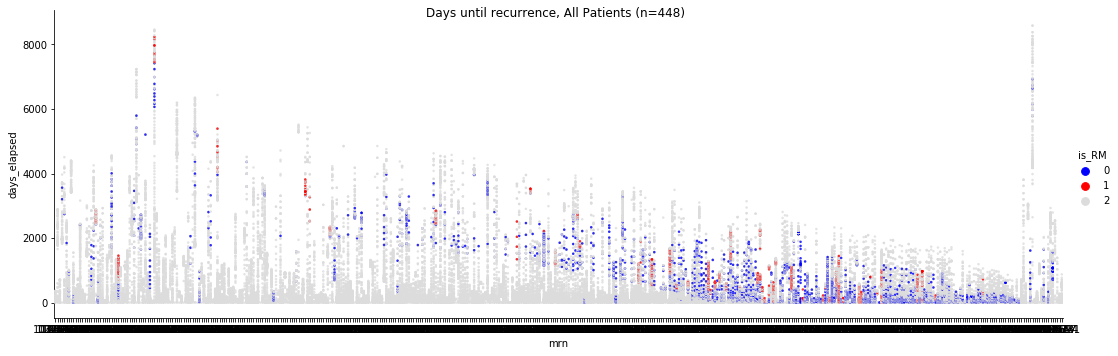

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df_working=df_rebuilt
df_working['mrn']=df_working['mrn'].astype(str)
grid=sns.catplot(x='mrn', y="days_elapsed", hue="is_RM", palette={0:'Blue',1:'Red',2:'#DCDCDC'},**{'alpha':.8,'s':2.5},jitter=False, data=df_working, height=5, aspect=3)
grid.fig.suptitle('Days until recurrence, All Patients (n='+str(len(ptx_info))+')')
plt.savefig('recurrence_timeline_all_encounters.png')

In [45]:
def graph_trajectory(mrns,phantoms=False,fig_title='',ascending=True):
    '''takes a list of mrns and outputs ptx trajectory fig of those mrns, with optional figure title/saving'''
    df=pd.read_csv('Total_Enc_Info.csv')
    df_mask=[]
    for index,row in df.iterrows():
        if row['mrn'] in mrns:
            df_mask.append(True)
        else:
            df_mask.append(False)
    df=df[df_mask]
    ### filter out phantoms, default phantoms=False (get rid of lists with only unlabeled encounters)
    if not phantoms:
        mrns_to_keep=[]
        for index,row in df.iterrows():
            if row['is_RM']<2 and row['mrn'] not in mrns_to_keep:
                mrns_to_keep.append(row['mrn'])
        df=df[df['mrn'].isin(mrns_to_keep)]
    ### sort df by patient in ascending order of days_elapsed, default is ascending=True
    d={}
    counts=[]
    for mrn in df.mrn.unique():
        df_sub=df[df.mrn==mrn]
        try:
            d[mrn]=df_sub.iloc[-1].days_elapsed-df_sub.iloc[0].days_elapsed
        except:
            d[mrn]=0
    for index,row in df.iterrows():
        counts.append(d[row['mrn']])
    df['rank_order']=counts
    df=df.sort_values(by='rank_order',ascending=ascending)
    order=df.mrn.unique()
    ### cast mrn to string so that it is evenly distributed on the x-axis
    #df['mrn']=df['mrn'].astype(str)
    
    ### plot
    grid=sns.catplot(x='mrn', y="days_elapsed", hue="is_RM", palette={0:'Blue',1:'Red',2:'#DCDCDC'},**{'alpha':.8,'s':1.75},
                     jitter=False, data=df, height=5, aspect=3,order=order)
    grid.fig.suptitle('Days until recurrence (n='+str(len(df.mrn.unique()))+')')
    if fig_title !="":
        plt.savefig(fig_title)

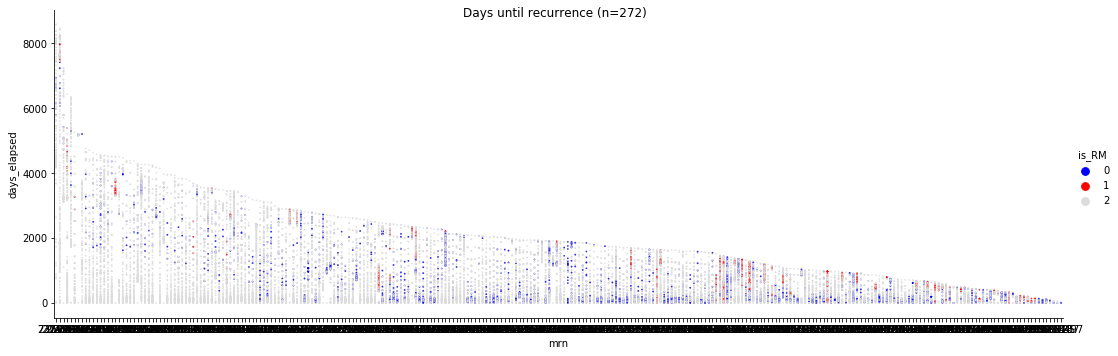

In [41]:
df=pd.read_csv('Total_Enc_Info.csv')
mrns_to_graph=df.mrn.unique()
graph_trajectory(mrns_to_graph,ascending=False,fig_title='recurrence_timeline_all_encounters.png')

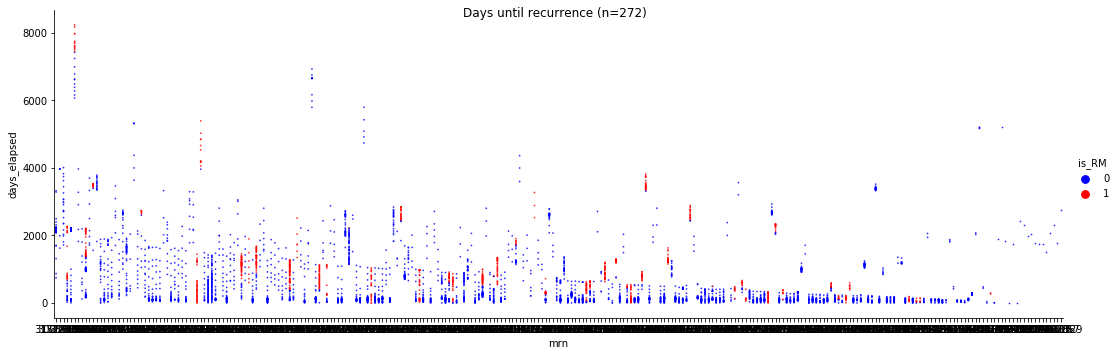

In [48]:
df=pd.read_csv('RM_MCs.csv')
mrns_to_graph=df.mrn.unique()
graph_trajectory(mrns_to_graph,ascending=False,fig_title='recurrence_timeline_all_encounters_with_info.png')